## About Dataset


link  https://www.kaggle.com/datasets/mubeenshehzadi/penguin-species-dataset



This dataset offers comprehensive details on various penguin species,including sex classification , physical characteristics including body mass, flipper length, bill length , and bill depth as well as the species habitats (islands). It is frequently used to investigate species differences and ecological patterns in data analysis, visualization, and machine learning applications.This dataset includes 344 rows , 9 columns.

## Imports

In [30]:
import numpy as np
import pandas as pd
import os
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler


## Load Tha Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("mubeenshehzadi/penguin-species-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'penguin-species-dataset' dataset.
Path to dataset files: /kaggle/input/penguin-species-dataset


In [3]:
print(os.listdir(path))

['penguins (1).csv']


In [4]:
df = pd.read_csv(os.path.join(path,'penguins (1).csv'))

## Explore Tha Data

In [5]:
df.isnull().sum().sum()

np.int64(19)

In [6]:
df.duplicated().sum()

np.int64(0)

## Visualize The Data


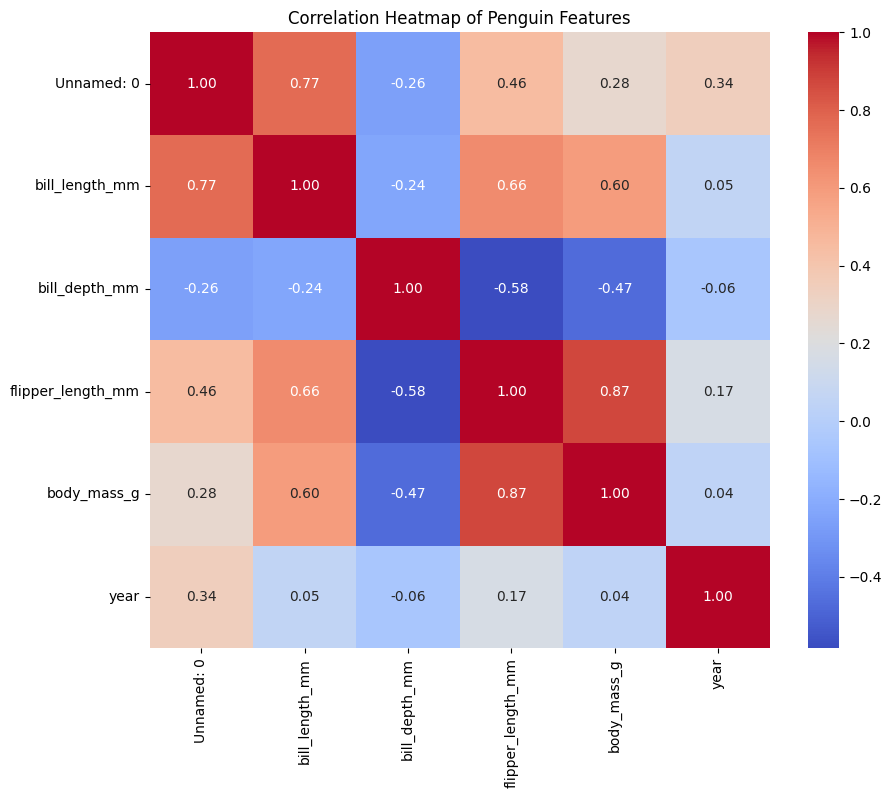

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Penguin Features')
plt.show()


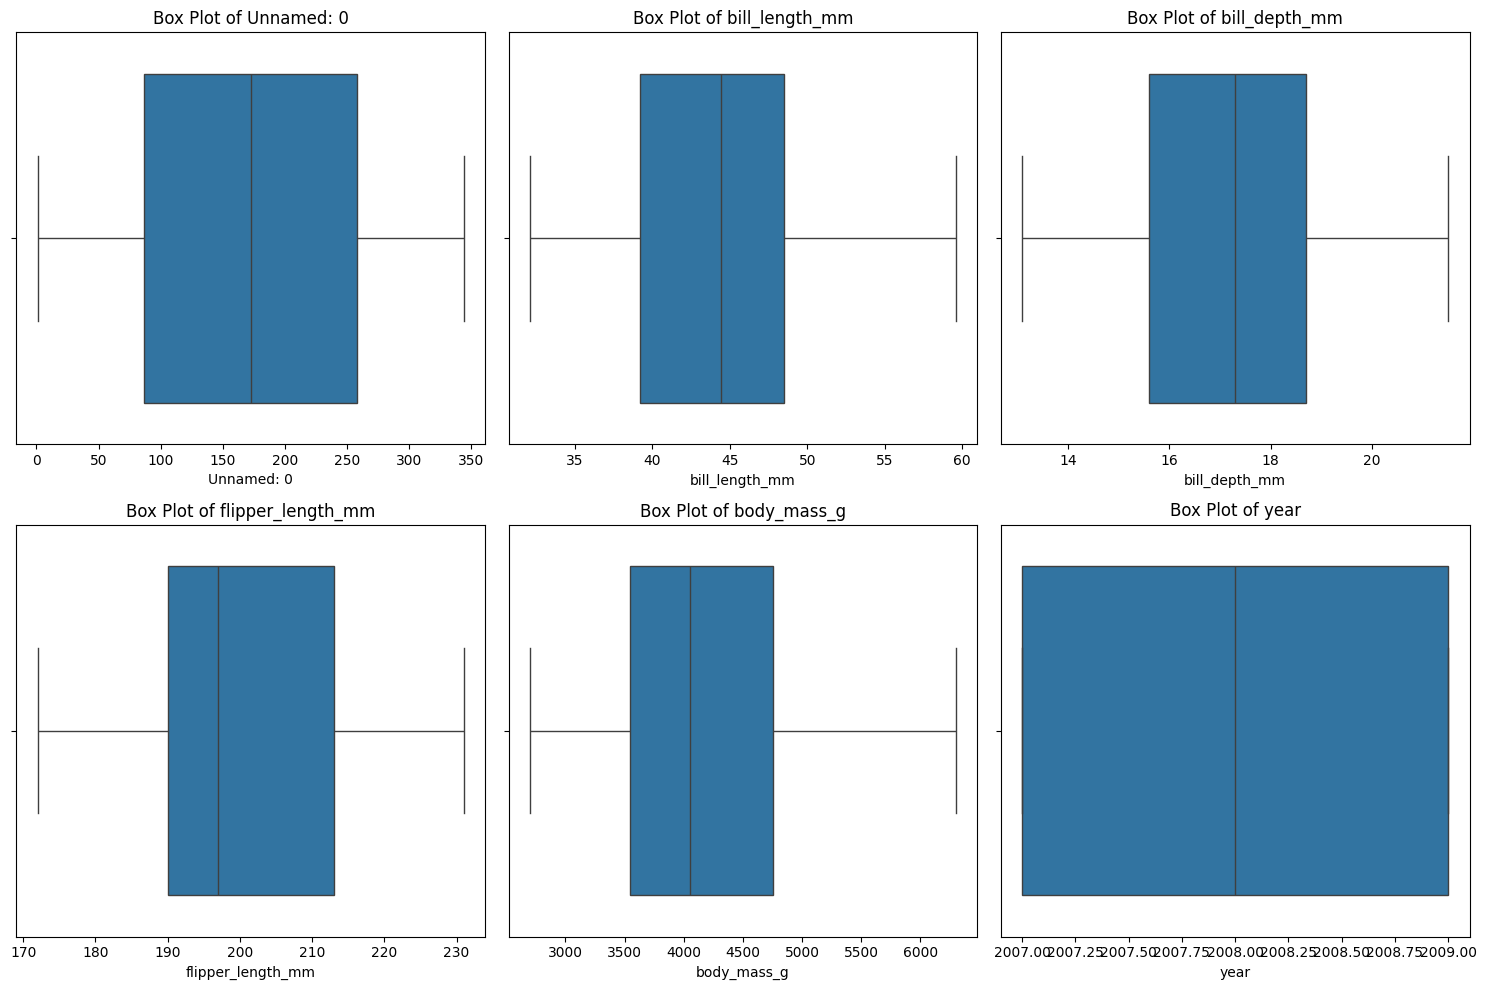

In [8]:
# Plot box plots for outliers
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [9]:
df.shape

(344, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


## Preprocessing

In [11]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=np.number)

# Fill missing values in numerical columns with the mean of each column
df[numerical_df.columns] = numerical_df.fillna(numerical_df.mean())

In [12]:
cat_df = df.select_dtypes(object)

# Fill missing values in categorical columns with the mode of each column
for col in cat_df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [14]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
df["sex"] = df["sex"].apply(lambda x:1 if x == "male" else 0)

In [16]:
cat = ["island"]

dummy = pd.get_dummies(df[cat]).astype(int)

df = pd.concat([df,dummy], axis=1)

df = df.drop(cat, axis=1)

In [17]:
df = df.drop("Unnamed: 0",axis=1)

In [18]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.10000,18.70000,181.000000,3750.000000,1,2007,0,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0,2007,0,0,1
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0,2007,0,0,1
3,Adelie,43.92193,17.15117,200.915205,4201.754386,1,2007,0,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0,2007,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   bill_length_mm     344 non-null    float64
 2   bill_depth_mm      344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   sex                344 non-null    int64  
 6   year               344 non-null    int64  
 7   island_Biscoe      344 non-null    int64  
 8   island_Dream       344 non-null    int64  
 9   island_Torgersen   344 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 27.0+ KB


## Train Test Split

In [20]:
X = df.drop("species",axis=1)
y = df["species"]

In [26]:
y

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Chinstrap
340,Chinstrap
341,Chinstrap
342,Chinstrap


In [22]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1,2007,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,2007,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,0,2007,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,1,2007,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,2007,0,0,1
...,...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,1,2009,0,1,0
340,43.50000,18.10000,202.000000,3400.000000,0,2009,0,1,0
341,49.60000,18.20000,193.000000,3775.000000,1,2009,0,1,0
342,50.80000,19.00000,210.000000,4100.000000,1,2009,0,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(

                                                    X,y,
                                                    train_size=0.75,
                                                    random_state=42,
                                                    stratify= y
)

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## RandomForest Model And results and Confusion Matrix

In [29]:
models = {
    "XGBoost": XGBClassifier(n_estimators=400, learning_rate=0.08, max_depth=4,
                             subsample=0.9, colsample_bytree=0.9,
                             objective="multi:softprob", eval_metric="mlogloss", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, multi_class='multinomial')
}

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

for name, model in models.items():
    if name == "LogisticRegression":
        model.fit(X_train, y_train_encoded)
        y_pred_encoded = model.predict(X_test)
    else:
        model.fit(X_train, y_train_encoded)
        y_pred_encoded = model.predict(X_test)

    # Decode predictions back to original labels for evaluation
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.3f} | Macro-F1: {f1:.3f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


=== XGBoost ===
Accuracy: 1.000 | Macro-F1: 1.000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

[[30  0  0]
 [ 0 14  0]
 [ 0  0 25]]

=== RandomForest ===
Accuracy: 0.986 | Macro-F1: 0.983
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

[[29  1  0]
 [ 0 14  0]
 [ 0  0 25]]

=== LogisticRegression ===
Accuracy: 1.000 | Macro-F1: 1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
